In [1]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib as plt
import pandas as pd
import numpy as np
import time
import seaborn as sns

In [46]:


df4 = pd.read_csv('leg4_combined.csv')
df3 = pd.read_csv('leg3_combined.csv')
df2 = pd.read_csv('leg2_combined.csv')
df = pd.concat([df4, df3, df2], axis=0)
#df['PCO2.H2O_mmm'] = df['PCO2.H2O_mmm'].astype(float)
#df.dtypes
df

,LATITUDE,LONGITUD,PDMEAN,TOTAL,dataid,NMEA.Wind_Speed,NMEA.Wind_Angle,NMEA.Wave_Height,PCO2.H2O_mmm,PCO2.CO2_umm,...,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.SBE45_Conductivity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,date,time
0,26.68929,-29.05914,7.5,0.0000,1643441400000000000,6.880000,249.000000,0.0,0.0,0.0,...,1019.707153,36.591,5.289,93.019997,12.04,-0.45,22.75,-0.13,20220129,7.5
1,26.68929,-29.05914,15.0,4.3472,1643441400000000000,6.880000,249.000000,0.0,0.0,0.0,...,1019.707153,36.591,5.289,93.019997,12.04,-0.45,22.75,-0.13,20220129,7.5
2,26.68929,-29.05914,25.0,10.4678,1643441400000000000,6.880000,249.000000,0.0,0.0,0.0,...,1019.707153,36.591,5.289,93.019997,12.04,-0.45,22.75,-0.13,20220129,7.5
3,26.68929,-29.05914,35.0,12.3473,1643441400000000000,6.880000,249.000000,0.0,0.0,0.0,...,1019.707153,36.591,5.289,93.019997,12.04,-0.45,22.75,-0.13,20220129,7.5
4,26.68929,-29.05914,45.0,14.3287,1643441400000000000,6.880000,249.000000,0.0,0.0,0.0,...,1019.707153,36.591,5.289,93.019997,12.04,-0.45,22.75,-0.13,20220129,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203573,22.65403,-85.02448,475.0,54.4916,1637595000000000000,16.780001,345.333344,0.0,0.0,0.0,...,1011.383362,35.824,5.835,93.330002,1.22,-0.51,28.84,-0.21,20211122,15.5
203574,22.65403,-85.02448,485.0,25.4085,1637595000000000000,16.780001,345.333344,0.0,0.0,0.0,...,1011.383362,35.824,5.835,93.330002,1.22,-0.51,28.84,-0.21,20211122,15.5
203575,22.65403,-85.02448,495.0,7.1735,1637595000000000000,16.780001,345.333344,0.0,0.0,0.0,...,1011.383362,35.824,5.835,93.330002,1.22,-0.51,28.84,-0.21,20211122,15.5
203576,22.65403,-85.02448,505.0,0.5738,1637595000000000000,16.780001,345.333344,0.0,0.0,0.0,...,1011.383362,35.824,5.835,93.330002,1.22,-0.51,28.84,-0.21,20211122,15.5


In [34]:
df.isnull().any()

LATITUDE                        False
LONGITUD                        False
PDMEAN                          False
TOTAL                           False
dataid                          False
NMEA.Wind_Speed                  True
NMEA.Wind_Angle                  True
NMEA.Wave_Height                 True
PCO2.H2O_mmm                     True
PCO2.CO2_umm                     True
PCO2.atm_cond                    True
NMEA.Humidity                    True
NMEA.Trykk                       True
FerryBox.SBE45_Salinity          True
FerryBox.SBE45_Conductivity      True
FerryBox.Optode_Saturation       True
FerryBox.C3_Turbidity            True
FerryBox.C3_CHLAFluorescence     True
FerryBox.C3_Temperature          True
FerryBox.C3_CDOMFluorescence     True
date                            False
time                            False
dtype: bool

In [47]:
# Fill NaNs with median value of the column
df = df.fillna(df.median())
#df = df.drop(columns=['dataid'])
df.isnull().any()

LATITUDE                        False
LONGITUD                        False
PDMEAN                          False
TOTAL                           False
dataid                          False
NMEA.Wind_Speed                 False
NMEA.Wind_Angle                 False
NMEA.Wave_Height                False
PCO2.H2O_mmm                    False
PCO2.CO2_umm                    False
PCO2.atm_cond                   False
NMEA.Humidity                   False
NMEA.Trykk                      False
FerryBox.SBE45_Salinity         False
FerryBox.SBE45_Conductivity     False
FerryBox.Optode_Saturation      False
FerryBox.C3_Turbidity           False
FerryBox.C3_CHLAFluorescence    False
FerryBox.C3_Temperature         False
FerryBox.C3_CDOMFluorescence    False
date                            False
time                            False
dtype: bool

In [48]:
y = df.iloc[:, df.columns == 'TOTAL']
X = df.iloc[:, df.columns != 'TOTAL']

y = y.reset_index()
X = X.reset_index()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

TOTAL    False
dtype: bool

Feature: LATITUDE, Score: 0.13843
Feature: LONGITUD, Score: 0.17344
Feature: PDMEAN, Score: 0.32133
Feature: dataid, Score: 0.07943
Feature: NMEA.Wind_Speed, Score: 0.03878
Feature: NMEA.Wind_Angle, Score: 0.02884
Feature: NMEA.Wave_Height, Score: 0.00000
Feature: PCO2.H2O_mmm, Score: 0.00243
Feature: PCO2.CO2_umm, Score: 0.00916
Feature: PCO2.atm_cond, Score: 0.00101
Feature: NMEA.Humidity, Score: 0.01954
Feature: NMEA.Trykk, Score: 0.02422
Feature: FerryBox.SBE45_Salinity, Score: 0.01594
Feature: FerryBox.SBE45_Conductivity, Score: 0.00563
Feature: FerryBox.Optode_Saturation, Score: 0.01576
Feature: FerryBox.C3_Turbidity, Score: 0.02617
Feature: FerryBox.C3_CHLAFluorescence, Score: 0.00549
Feature: FerryBox.C3_Temperature, Score: 0.03148
Feature: FerryBox.C3_CDOMFluorescence, Score: 0.00548
Feature: date, Score: 0.00102
Feature: time, Score: 0.05642


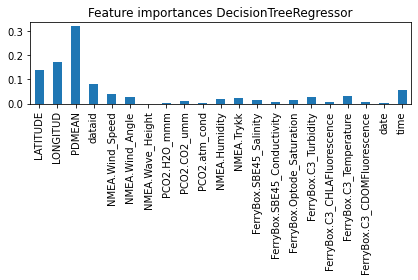

In [19]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: %s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
importances = pd.Series(importance, index=X.columns)

fig, ax = pyplot.subplots()
importances.plot.bar([x for x in range(len(importance))], importance)
ax.set_title("Feature importances DecisionTreeRegressor")
fig.tight_layout()
pyplot.show()


In [227]:
for name, importance in zip(X.columns, model.feature_importances_):
    print(name, importance)

LATITUDE 0.1954424863545709
LONGITUD 0.13298994077178766
NMEA.Wind_Speed 0.2735912827836797
NMEA.Wind_Angle 0.03667558378926833
NMEA.Wave_Height 0.0
PCO2.H2O_mmm 9.110641469806071e-05
PCO2.CO2_umm 0.0002839428021681962
PCO2.atm_cond 0.0003113901039584931
NMEA.Humidity 0.06178955640223025
NMEA.Trykk 0.030173927633750836
FerryBox.SBE45_Salinity 0.005601616668487746
FerryBox.SBE45_Conductivity 0.0070072259549085695
FerryBox.Optode_Saturation 0.03835105676775671
FerryBox.C3_Turbidity 0.03349692871697584
FerryBox.C3_CHLAFluorescence 0.05409699811365323
FerryBox.C3_Temperature 0.07226439356265331
FerryBox.C3_CDOMFluorescence 0.03175337979755706
date 0.004375627711757181
time 0.02170355565013798


In [20]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train.values.ravel())
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

Elapsed time to compute the importances: 0.675 seconds


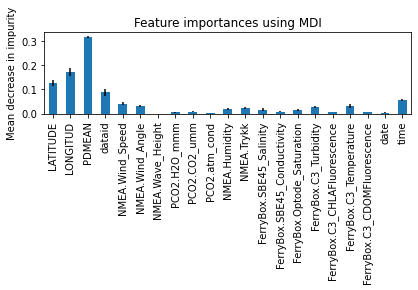

In [21]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = pyplot.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [24]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X.columns)

Elapsed time to compute the importances: 745.687 seconds


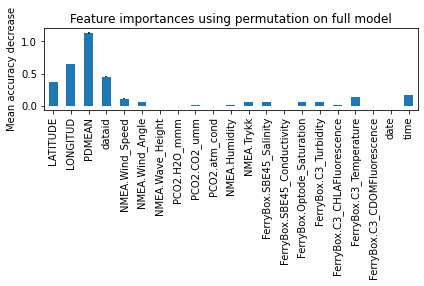

In [25]:
fig, ax = pyplot.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
pyplot.show()

In [30]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [32]:
X_train

,LATITUDE,LONGITUD,PDMEAN,dataid,NMEA.Wind_Speed,NMEA.Wind_Angle,NMEA.Wave_Height,PCO2.H2O_mmm,PCO2.CO2_umm,PCO2.atm_cond,...,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.SBE45_Conductivity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,date,time
23943,-3.99988,-30.81445,725.0,1644523200000000000,11.083333,172.479164,0.0,0.00,0.000000,0.00,...,1011.635010,35.771000,5.672,94.529999,0.81,-0.50,27.660000,-0.14,20220210,20.0
35341,34.88966,-74.16136,115.0,1639540800000000000,16.500000,69.166664,0.0,0.82,369.880005,9.94,...,1027.553345,36.069000,5.312,93.099998,2.35,-0.50,23.629999,-0.14,20211215,4.0
183133,19.96553,-81.58134,155.0,1637420400000000000,11.083333,172.479164,0.0,0.00,0.000000,0.00,...,1011.635010,35.771000,5.672,94.529999,0.81,-0.50,27.660000,-0.14,20211120,15.0
99089,11.90908,-35.33490,255.0,1634275800000000000,12.733334,201.000000,0.0,0.00,0.000000,0.00,...,1011.348328,35.830002,5.789,95.440002,0.84,-0.50,28.400000,-0.18,20211015,5.5
106911,11.73197,-37.12813,135.0,1634331600000000000,12.333333,133.833328,0.0,0.00,0.000000,0.00,...,1009.771667,0.000000,0.000,0.000000,0.00,0.00,0.000000,0.00,20211015,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38885,20.58773,-23.59767,605.0,1633734000000000000,10.050000,207.666672,0.0,0.00,0.000000,0.00,...,1011.656677,36.369999,5.675,95.349998,0.63,-0.51,26.639999,-0.17,20211008,23.0
178184,19.31880,-80.57848,215.0,1637386200000000000,11.083333,172.479164,0.0,0.00,0.000000,0.00,...,1011.635010,35.771000,5.672,94.529999,0.81,-0.50,27.660000,-0.14,20211120,5.5
50938,17.92871,-25.18432,625.0,1633836600000000000,0.000000,0.000000,0.0,0.62,455.880005,9.97,...,0.000000,0.000000,0.000,0.000000,0.00,0.00,0.000000,0.00,20211010,3.5
65873,15.85957,-27.82802,575.0,1633971600000000000,10.266666,150.000000,0.0,0.00,0.000000,0.00,...,1012.655029,0.000000,0.000,0.000000,0.00,0.00,0.000000,0.00,20211011,17.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:62: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:76: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/anaconda3/lib/python3.8/site-package

Text(0.5, 1.0, 'Total')

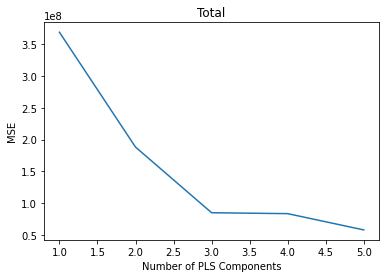

In [50]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X_train)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y_train, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X_train), y_train, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Total')

In [43]:
np.any(np.isnan(X_train))

False

In [44]:
np.all(np.isfinite(X_train))

True

In [51]:
X_train.describe()

,index,LATITUDE,LONGITUD,PDMEAN,dataid,NMEA.Wind_Speed,NMEA.Wind_Angle,NMEA.Wave_Height,PCO2.H2O_mmm,PCO2.CO2_umm,...,NMEA.Trykk,FerryBox.SBE45_Salinity,FerryBox.SBE45_Conductivity,FerryBox.Optode_Saturation,FerryBox.C3_Turbidity,FerryBox.C3_CHLAFluorescence,FerryBox.C3_Temperature,FerryBox.C3_CDOMFluorescence,date,time
count,213429.000000,213429.000000,213429.000000,213429.000000,2.134290e+05,213429.000000,213429.000000,213429.0,213429.000000,213429.000000,...,213429.000000,213429.000000,213429.000000,213429.000000,213429.000000,213429.000000,213429.000000,213429.000000,2.134290e+05,213429.000000
mean,78613.421789,17.943835,-46.962847,354.985077,1.636914e+18,10.594045,173.794039,0.0,0.092570,71.775106,...,956.579857,29.807429,4.742644,77.687792,11.574472,-0.400627,23.403227,-0.119805,2.021245e+07,11.282255
std,62166.456626,7.382200,23.572730,207.590209,3.656603e+15,3.712039,68.864812,0.0,0.392789,158.212818,...,231.544713,13.272977,2.116844,36.232191,86.361461,0.190524,10.653446,0.065667,3.279144e+03,6.854122
min,0.000000,-9.958870,-85.073560,7.500000,1.633428e+18,0.000000,0.000000,0.0,-1.410000,-0.080000,...,0.000000,0.000000,0.000000,0.000000,-0.460000,-0.520000,0.000000,-0.290000,2.021100e+07,0.000000
25%,23707.000000,12.861040,-75.105310,175.000000,1.634020e+18,9.516666,142.833328,0.0,0.000000,0.000000,...,1010.596680,35.099998,5.467000,92.830002,0.610000,-0.510000,25.650000,-0.160000,2.021101e+07,5.500000
50%,61275.000000,17.741750,-36.618310,355.000000,1.634636e+18,11.083333,172.479164,0.0,0.000000,0.000000,...,1011.635010,35.771000,5.672000,94.529999,0.810000,-0.500000,27.660000,-0.140000,2.021102e+07,11.000000
75%,132480.000000,22.505740,-28.668160,535.000000,1.638758e+18,12.471429,197.833328,0.0,0.000000,0.000000,...,1012.626648,35.851002,5.797000,95.489998,0.940000,-0.430000,28.870001,-0.110000,2.021121e+07,17.000000
max,203577.000000,35.436650,-16.889550,725.000000,1.645304e+18,24.049999,348.416656,0.0,3.460000,467.619995,...,1028.915039,36.740002,5.962000,97.260002,2607.669922,0.840000,43.910000,0.240000,2.022022e+07,23.500000


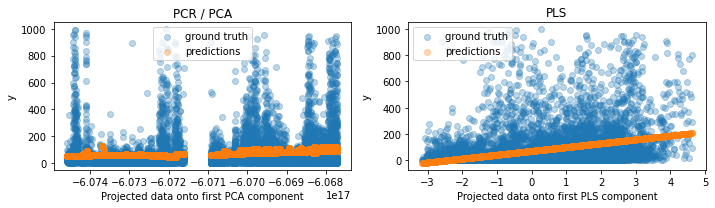

In [181]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca2 = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = pyplot.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca2.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca2.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
pyplot.tight_layout()
pyplot.show()

In [178]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared 0.015
PLS r-squared 0.101


In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender
#data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})
  
# the independent variables set
#X = data[['Gender', 'Height', 'Weight']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                         feature            VIF
0                       LATITUDE       5.237309
1                       LONGITUD       7.871399
2                         PDMEAN       1.000000
3                NMEA.Wind_Speed       2.959733
4                NMEA.Wind_Angle       2.551209
5               NMEA.Wave_Height            NaN
6                   PCO2.H2O_mmm      53.666618
7                   PCO2.CO2_umm      17.640556
8                  PCO2.atm_cond      37.210327
9                  NMEA.Humidity       3.817430
10                    NMEA.Trykk      10.268111
11       FerryBox.SBE45_Salinity      14.817884
12   FerryBox.SBE45_Conductivity      22.906818
13    FerryBox.Optode_Saturation       4.509138
14         FerryBox.C3_Turbidity       1.574964
15  FerryBox.C3_CHLAFluorescence       2.985974
16       FerryBox.C3_Temperature      15.463757
17  FerryBox.C3_CDOMFluorescence       3.543745
18                          date  865914.424355
19                          time       1

In [265]:
X_wo_dataid = X.drop(columns=['dataid'])
vif_data_wo_dataid = pd.DataFrame()
vif_data_wo_dataid["feature"] = X_wo_dataid.columns
  
# calculating VIF for each feature
vif_data_wo_dataid["VIF"] = [variance_inflation_factor(X_wo_dataid.values, i)
                          for i in range(len(X_wo_dataid.columns))]
  
print(vif_data_wo_dataid)

KeyError: "['dataid'] not found in axis"

<AxesSubplot:xlabel='PDMEAN', ylabel='TOTAL'>

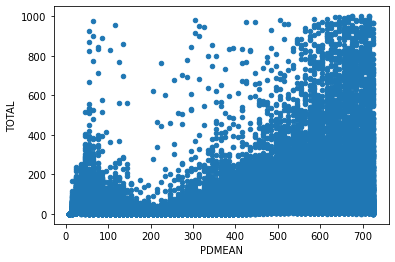

In [249]:
#sns.pairplot(df,y_vars=["TOTAL"],x_vars=df.columns)
df.plot.scatter(x='PDMEAN',
                y='TOTAL')

<AxesSubplot:xlabel='NMEA.Wind_Speed', ylabel='TOTAL'>

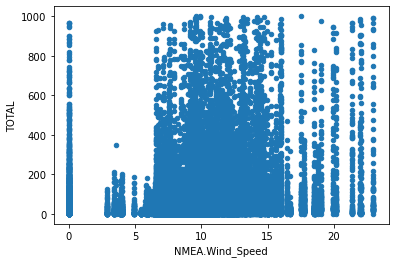

In [253]:
df.plot.scatter(x='NMEA.Wind_Speed',
                y='TOTAL')

<AxesSubplot:xlabel='TOTAL', ylabel='LONGITUD'>

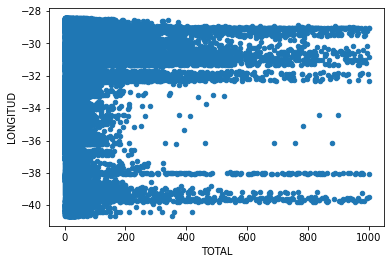

In [254]:
df.plot.scatter(x='TOTAL',
                y='LONGITUD')

<AxesSubplot:xlabel='TOTAL', ylabel='LATITUDE'>

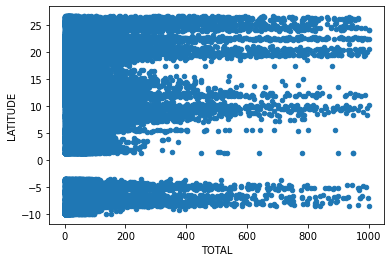

In [255]:
df.plot.scatter(x='TOTAL',
                y='LATITUDE')